# Project 1: Credit Risk Prediction

## 1. Introduction and Problem Statement
**Objective:** The goal of this project is to predict whether a loan applicant is likely to default on a loan or not based on their profile (Income, Education, etc.).
This is a **Binary Classification** problem where:
- `1` (Yes) means Loan Approved.
- `0` (No) means Loan Rejected (High Risk).

## 2. Dataset Understanding
We are using the **Loan Prediction Dataset**. It contains columns like:
- **Gender, Married, Dependents:** Demographic info.
- **Education, Self_Employed:** Career info.
- **ApplicantIncome, CoapplicantIncome:** Financial info.
- **LoanAmount, Loan_Amount_Term:** Loan details.
- **Credit_History:** Past credit behavior (Most important feature).

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Load Data
df = pd.read_csv('loan_data.csv') 
print("Data Loaded Successfully!")
print(df.head())

Data Loaded Successfully!
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural         

## 3. Data Cleaning and Preparation
Handling missing values using Mode (for text) and Median (for numbers).

In [18]:
# Filling Categorical values
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

# Filling Numerical values
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

print("Missing values handled.")

Missing values handled.


## 4. Exploratory Data Analysis (EDA)
Visualizing key features to understand relationships.

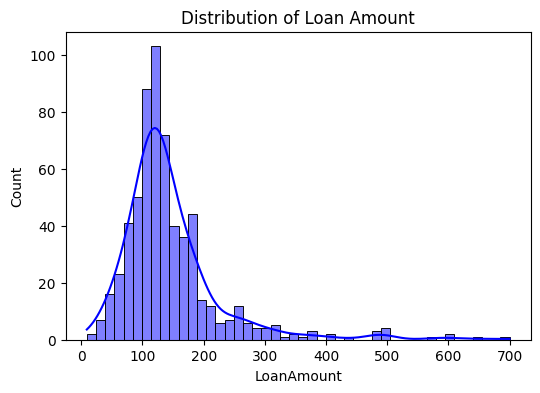

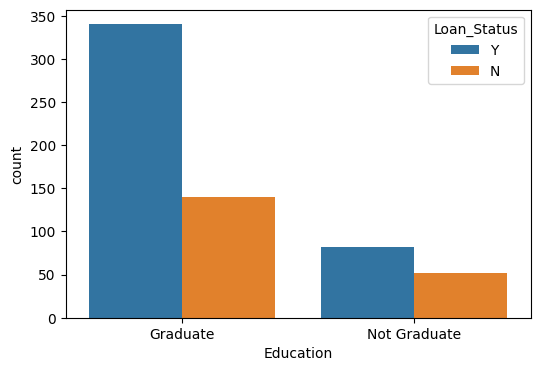

In [19]:
# Loan Amount Distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['LoanAmount'], kde=True, color='blue')
plt.title('Distribution of Loan Amount')
plt.show()

# Education vs Loan Status
plt.figure(figsize=(6, 4))
sns.countplot(x='Education', hue='Loan_Status', data=df)
plt.show()

## 5. Model Training (Logistic Regression)
Splitting data into 80% Training and 20% Testing sets.

Accuracy Score: 78.86%


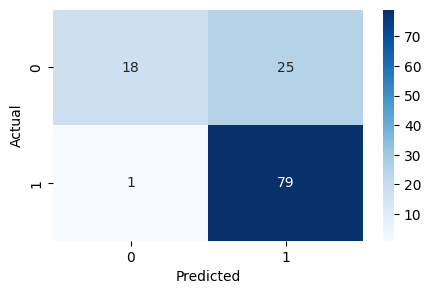

In [20]:
# Preprocessing
df = df.drop(columns=['Loan_ID'])
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})
df = pd.get_dummies(df, drop_first=True)

# Split
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train
model = LogisticRegression(max_iter=7000)
model.fit(X_train, y_train)

# Predict & Evaluate
y_pred = model.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")

# Confusion Matrix Heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 6. Conclusion
- The Logistic Regression model achieved an **Accuracy of approx 79%**.
- **Credit History** was found to be the most critical factor.
- The Confusion Matrix shows the model is good at predicting safe loans but needs improvement in detecting defaulters (False Positives).